In [1]:
# 导入必要库
import matplotlib.pyplot as plt
import cv2
import numpy as np
from scipy import interpolate
%matplotlib inline
np.set_printoptions(suppress=True, threshold=np.nan)

In [43]:
def guassXY(x,y,sig1,sig2,rou = 0.9):
    return (1/(2*np.pi*sig1*sig2*2*np.sqrt(1-rou*rou)))*np.exp((-1/(2*(1-rou*rou)))*(x*x/(sig1*sig1) - rou*x*y/2 + y*y/(sig2*sig2)))



In [44]:
x = np.array(np.arange(-2,2,0.1))
y = np.array(np.arange(-2,2,0.1))

xv, yv = np.meshgrid(x, y)

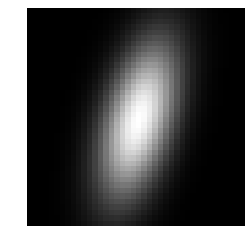

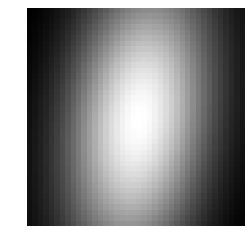

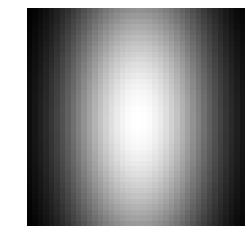

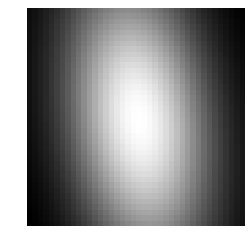

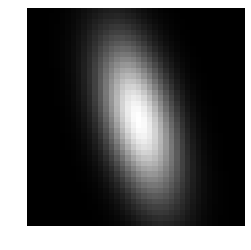

(<matplotlib.image.AxesImage at 0x23bcd779fd0>, (-0.5, 39.5, 39.5, -0.5), None)

In [45]:
rst1 = guassXY(xv,yv,1,2,-0.9)

rst2 = guassXY(xv,yv,1,2,-0.4)

rst3 = guassXY(xv,yv,1,2,0)

rst4 = guassXY(xv,yv,1,2,0.4)

rst5 = guassXY(xv,yv,1,2,0.9)
plt.imshow(rst1,cmap = 'gray'),plt.axis("off"),plt.show()
plt.imshow(rst2,cmap = 'gray'),plt.axis("off"),plt.show()
plt.imshow(rst3,cmap = 'gray'),plt.axis("off"),plt.show()
plt.imshow(rst4,cmap = 'gray'),plt.axis("off"),plt.show()
plt.imshow(rst5,cmap = 'gray'),plt.axis("off"),plt.show()

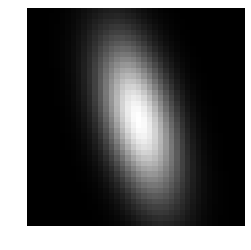

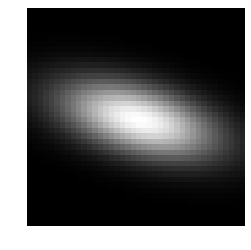

(<matplotlib.image.AxesImage at 0x23bcc66fcc0>, (-0.5, 39.5, 39.5, -0.5), None)

In [39]:
rst6 = guassXY(xv,yv,1,2,0.9)
plt.imshow(rst6,cmap = 'gray'),plt.axis("off"),plt.show()
rst6 = guassXY(xv,yv,2,1,0.9)
plt.imshow(rst6,cmap = 'gray'),plt.axis("off"),plt.show()

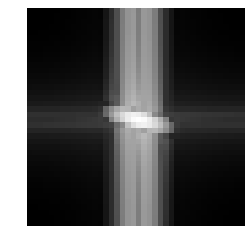

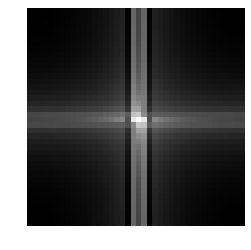

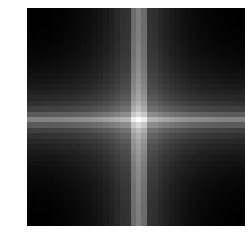

((-0.5, 39.5, 39.5, -0.5), None)

In [57]:
f1 = np.fft.fft2(rst1)
fshift1 = np.fft.fftshift(f1)
magnitude_spectrum1 = np.log(np.abs(fshift1))

f2 = np.fft.fft2(rst2)
fshift2 = np.fft.fftshift(f2)
magnitude_spectrum2 = np.log(np.abs(fshift2))

f3 = np.fft.fft2(rst3)
fshift3 = np.fft.fftshift(f3)
magnitude_spectrum3 = np.log(np.abs(fshift3))

plt.imshow(magnitude_spectrum1, cmap = 'gray')
plt.axis("off"),plt.show()
plt.imshow(magnitude_spectrum2, cmap = 'gray')
plt.axis("off"),plt.show()
plt.imshow(magnitude_spectrum3,cmap = 'gray')
plt.axis("off"),plt.show()

(Text(0.5, 1.0, 'dst'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

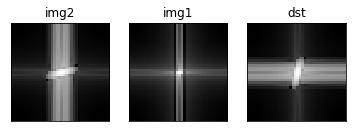

In [55]:
f1 = np.fft.fft2(rst4)
fshift1 = np.fft.fftshift(f1)
magnitude_spectrum1 = np.log(np.abs(fshift1))

f2 = np.fft.fft2(rst5)
fshift2 = np.fft.fftshift(f2)
magnitude_spectrum2 = np.log(np.abs(fshift2))

f3 = np.fft.fft2(rst6)
fshift3 = np.fft.fftshift(f3)
magnitude_spectrum3 = np.log(np.abs(fshift3))

plt.subplot(132),plt.imshow(magnitude_spectrum1, cmap = 'gray')
plt.title('img1'), plt.xticks([]), plt.yticks([])
plt.subplot(131),plt.imshow(magnitude_spectrum2, cmap = 'gray')
plt.title('img2'),plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(magnitude_spectrum3,cmap = 'gray')
plt.title('dst'), plt.xticks([]), plt.yticks([])

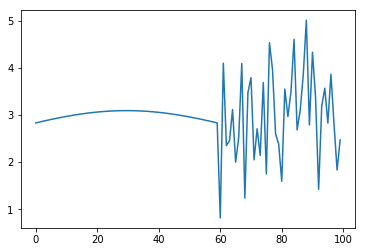

In [8]:
line1 = cv2.getGaussianKernel(60,40)*60 + 2
line2 = np.array(np.random.randn(40)) + 3
line= np.append(line1,line2)
plt.plot(line)  

[0.         0.         0.         0.01605491 0.04364178 0.09238965
 0.15232478 0.19558888 0.19558888 0.15232478 0.09238965 0.04364178
 0.01605491 0.         0.         0.        ]
(16,)


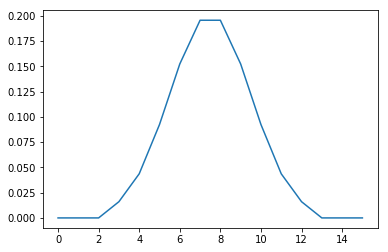

In [9]:
kx = cv2.getGaussianKernel(10,2)
zeros_pad = np.zeros((3,1))


fil_line =np.append(zeros_pad,kx)
fil_line =np.append(fil_line,zeros_pad)

plt.plot(fil_line)
print(fil_line)
print(fil_line.shape)

(Text(0.5, 1.0, 'dst'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

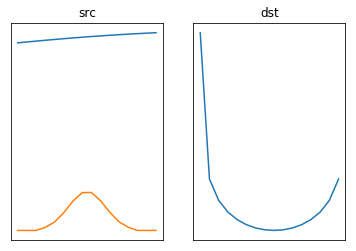

In [15]:
initial = 5

src3 = line[initial:initial + 16]
src3_fil = src3 * fil_line

dst3 = np.fft.fft(src3)

plt.subplot(121),plt.plot(src3),plt.plot(src3_fil)
plt.title('src'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.plot(np.log(np.abs(dst3)))
plt.title('dst'), plt.xticks([]), plt.yticks([])


(Text(0.5, 1.0, 'dst'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

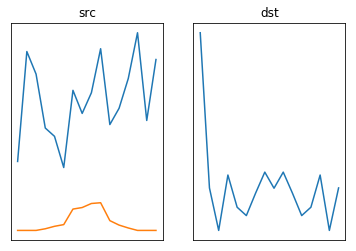

In [16]:
initial = 75

src3 = line[initial:initial + 16]
src3_fil = src3 * fil_line

dst3 = np.fft.fft(src3)

plt.subplot(121),plt.plot(src3),plt.plot(src3_fil)
plt.title('src'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.plot(np.log(np.abs(dst3)))
plt.title('dst'), plt.xticks([]), plt.yticks([])